# Procesamiento Digital de Audio
## Caleb Rascón
### Estimación de Múltiples Direcciones de Arribo
#### MUSIC Multi

In [2]:
#Bibliotecas
import numpy as np
from numpy import fft
from matplotlib import pyplot as plt


### Setup

In [6]:
doas = [-30, 40]    # Direction of arrival of both signals in degrees
d = 20              # Distance between microphones in meters
noise_w = 0.5       # Noise presence (between 0 and 1)
K = 200             # Signal size in samples, also frequency sampling

# Frequency vector
w = np.concatenate((np.arange(0,K//2 + 1), np.arange(-K//2 + 1, 0))) 

# Base frequency for signals
freq = [2, 4]

c = 343             # Speed of sound
fs = K              # Sampling frequency same as signal size (1 second)
t = np.arange(1, K + 1) / K  # Time vector (1 second)

N = 3               # Number of microphones
r = 2               # Number of signals in signal sub-space

# Original signals
s1 = np.sin(2 * np.pi * freq[0] * t)
s2 = np.sin(2 * np.pi * freq[1] * t)

s1_f = fft.fft(s1)
s2_f = fft.fft(s2)


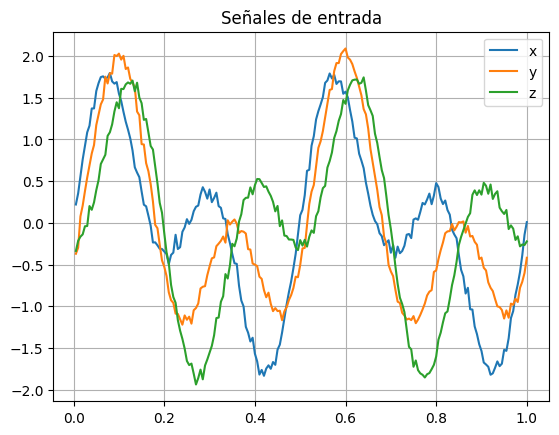

In [8]:
#Microphones
x = s1 + s2
y = fft.ifft(fft.fft(s1) * np.exp(-1j * 2 * np.pi * w * (d / c) * np.sin(doas[0] * np.pi / 180))).real + \
    fft.ifft(fft.fft(s2) * np.exp(-1j * 2 * np.pi * w * (d / c) * np.sin(doas[1] * np.pi / 180))).real
z = fft.ifft(fft.fft(s1) * np.exp(-1j * 2 * np.pi * w * (2 * d / c) * np.sin(doas[0] * np.pi / 180))).real + \
    fft.ifft(fft.fft(s2) * np.exp(-1j * 2 * np.pi * w * (2 * d / c) * np.sin(doas[1] * np.pi / 180))).real

# Adding noise
x += np.random.randn(K) * noise_w / 10
y += np.random.randn(K) * noise_w / 10
z += np.random.randn(K) * noise_w / 10

plt.figure()
plt.plot(t,x, label='x')
plt.plot(t,y, label='y')
plt.plot(t,z, label='z')
plt.title('Señales de entrada')
plt.legend()
plt.grid()
plt.show()

In [9]:
#Data matrix with noise
X = np.array([fft.fft(x), fft.fft(y), fft.fft(z)])

In [ ]:
#Define angles to look for orthogonality
angles = np.arange(-90,90,.1)
music_spectrum = np.zeros((r,len(angles)))

#Normally, you should do the next step for each appropriate frequency
# we're only doing it in the frequencies that most closely fit s1's and s2's frequency

this_ws = [2, 4]

for this_w in this_ws:
  pass